<h3 align = "center"> <font color=red>Examining The Long-Run Effects of Behavioural Interventions</font></h3>

|Name|Examnr.|
|----|-------|
|Jonathan Hawinkels|2020793|

### Research Question

*Are behavioural interventions effective in creating persistent long-run effects, and if so, could they be used in energy conservation?*

### Motivation

The motivation for this project is two-fold. Firstly, as has been well documented, the world is in the midst of a global warming crisis. There have been various forms of documentaries – ranging from people as varied as former Vice President of the United States Al Gore, to actor Leonardo DiCaprio – as well as several reports from scientific institutions worldwide. However, potentially the most damning piece of evidence regarding the global warming crisis was released last year, in a report from the United Nations (UN) Intergovernmental Panel on Climate Change (IPCC), which can be found here: _[IPCC Report](https://www.ipcc.ch/sr15/)_. Particular standouts from this report include an increase of approximately 1 degree Celsius from pre-industrial levels, and a need to limit this to a maximum of 1.5 degrees Celsius in the next twelve years, or else we face the prospect of a climate change catastrophe – which would include extreme heat, drought, floods and poverty. 

It is common knowledge that a primary contributor to global warming is the increase in Co2 emissions that are being released into the atmosphere. The link between the increase in these emissions, and the increased amount of energy consumed by humans over the past two centuries is clear. This energy consumption, particularly prior to the 21st century, has been made possible through the use of fossil fuels. It is this use of fossil fuels that is the biggest contributor to Co2 emissions, and it is therefore critical that the use of fossil fuels to provide energy is reduced. While there are numerous projects underway that are aiming to provide more sustainable sources of energy, it is also critical that humans attempt to be more environmentally conscious, and conserve energy wherever they can. 

When considering the importance of the next twelve years, as outlined in the _[IPCC Report](https://www.ipcc.ch/sr15/)_, the need for energy conservation by individuals is all the more important, as the world transitions away from fossil fuels to renewable energy. Thus, experiments into methods for energy conservation are critical, so that successful ways of conserving energy can be identified and introduced worldwide. However, it is not only energy consumption that leads to harmful emissions entering the Earth's atmosphere. There are also significant problems related pollution and excessive amounts of littering that plague our society and environment. Not only does this excess waste pollute the environment, it also requires resources to be put towards cleaning them up, when - as highlighted earlier - these resources need to be conserved. Thus, experiments into methods for energy conservation or waste conservation are critical, so that successful ways of conserving energy can be identified and introduced worldwide.

The need for these experiments brings the second motivating factor for this project into play. There has been success for behavioural interventions that increase social welfare across a wide range of areas, such as smoking, exercise, school performance and others in recent years. However, there has been little attempt to intervene in energy conservation, and similarly, there is little evidence that the afore-mentioned behavioural interventions have long-term effects.Indeed, the most publicised studies of this nature have been done by Hunt Allcott in [2011](https://www.sciencedirect.com/science/article/abs/pii/S0047272711000478) and Allcott and Rogers in [2014](https://www.sciencedirect.com/science/article/abs/pii/S0047272711000478), using home energy reports from a company called Opower. However, as this dataset is difficult to access due to an understandable need for privacy protection, a dataset from an experiment done by Dur and Vollaard in 2015 (_[Dur & Vollaard](https://research.tilburguniversity.edu/en/publications/the-power-of-a-bad-example-a-field-experiment-in-household-garbag-5)_). This is a well-known paper in the field of behavioural and the dataset allows me to test for persistence in the effects of the interventions.

### Method

The method for this project is a fairly simple three-step procedure.

1. Exploratory data analysis/Descriptive statistics
2. Visual analysis
3. Regression analysis

The combination of these three steps will paint a clear picture of whether there are persistent effects with regards to Dur and Vollaard's behavioural intervention. Each step allows me to get a clearer idea of the data I am dealing with, whilst also building towards the final answer of whether the effects are persistent or not.

### The Data

As mentioned in the [Motivation](#Motivation) above, the data is taken from _[Dur & Vollaard](https://research.tilburguniversity.edu/en/publications/the-power-of-a-bad-example-a-field-experiment-in-household-garbag-5)_. The authors conducted the experiment across 4000 households in Rotterdam, The Netherlands, from November 29, 2010 to March 3, 2011. The experiment consisted of a randomly assigned area in Rotterdam no longer receiving public cleaning services, in an attempt to reduce littering in the area. The logic is as follows: individuals believe that if someone is being paid to clean up after them, they do not have to clean up themselves, and are therefore more likely to litter. As the experiment was run for 3 months, it avoids a spontaneous behavioural response and allows testing for the presence of persistent effects to occur. 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

#Importing the data
Data = pd.read_csv('Python_Assignment.csv')

#Counting the number of observations
print('Data is composed of',Data.shape[0],'rows and',Data.shape[1],'columns in this DataFrame')

#Printing the first 5 rows
Data.head()

Data is composed of 3376 rows and 7 columns in this DataFrame


,route,calendar_week,residual_weight,LetterReceived,TreatmentOngoing,TreatmentCompleted,treatment
0,101,-15,9.4,0,0,0,0
1,101,-14,9.5,0,0,0,0
2,101,-13,9.0,0,0,0,0
3,101,-12,9.3,0,0,0,0
4,101,-11,9.4,0,0,0,0


#### Exploring The Data

In [24]:
#Keeping the relevant columns
GData = Data[['route', 'calendar_week', 'residual_weight', 'treatment']]

#Dropping missing values 
GData = GData.dropna()

#Counting the number of observations
print('We now have data that is composed of',GData.shape[0],'rows and',GData.shape[1],'columns')


#Viewing the dataframe
GData.head()

We now have data that is composed of 3340 rows and 4 columns


,route,calendar_week,residual_weight,treatment
0,101,-15,9.4,0
1,101,-14,9.5,0
2,101,-13,9.0,0
3,101,-12,9.3,0
4,101,-11,9.4,0


I have selected these columns as they are all that are required for analysing whether the effects of the interventions are persistent or not. The GData dataset provides information about the time of treatment, the amount of garbage and whether treatment has been delivered to that route.

In [25]:
GData.describe()

,route,calendar_week,residual_weight,treatment
count,3340.000000,3340.000000,3340.000000,3340.000000
mean,307.970359,10.484132,9.390329,0.467665
std,141.188556,15.021220,1.674163,0.499028
min,101.000000,-15.000000,4.020000,0.000000
25%,204.000000,-3.000000,8.340000,0.000000
50%,307.000000,10.000000,9.380000,0.000000
75%,410.000000,24.000000,10.500000,1.000000
max,513.000000,36.000000,14.800000,1.000000


While the table above provides some useful descriptive statistics, such as the start and end date of the treatment, and the mean residual weight of garbage collected, it does not provide any indication of whether the interventions were successful. A first step towards getting an idea of the success of the interventions will be to visualise the data. The most effective way to do so, is to examine the level of waste over time, by route. However, as there are 65 routes that were observed, it would be inefficient to provide output for all 65, when an accurate estimate of the effect - considering this is not a statistical test and is purely for understanding the data better - can be achieved with approximately 20%. As a result, the first 12 routes have been selected for examination.

Due to the regression analysis performed in the [Regression Analysis](#Regression-Analysis) section, I need to keep a copy of the original dataset, that has not been altered for visual inspection. This is done below.

In [26]:
GDataReg = GData

Back to the visual analysis.

### Visual Analysis

In [27]:
#Converting the route variable type from string to float

route_101_float = float(101)
route_102_float = float(102)
route_103_float = float(103)
route_104_float = float(104)
route_105_float = float(105)
route_106_float = float(106)
route_107_float = float(107)
route_108_float = float(108)
route_109_float = float(109)
route_110_float = float(110)
route_111_float = float(111)
route_112_float = float(112)

In [28]:
#Selecting the routes that I want to get visual data for

GData101 = GData.loc[GData['route']==route_101_float]
GData102 = GData.loc[GData['route']==route_102_float]
GData103 = GData.loc[GData['route']==route_103_float]
GData104 = GData.loc[GData['route']==route_104_float]
GData105 = GData.loc[GData['route']==route_105_float]
GData106 = GData.loc[GData['route']==route_106_float]
GData107 = GData.loc[GData['route']==route_107_float]
GData108 = GData.loc[GData['route']==route_108_float]
GData109 = GData.loc[GData['route']==route_109_float]
GData110 = GData.loc[GData['route']==route_110_float]
GData111 = GData.loc[GData['route']==route_111_float]
GData112 = GData.loc[GData['route']==route_112_float]

GData = pd.concat([GData101, GData102, GData103, GData104, GData105, GData106, GData107, GData108, GData109, GData110, GData111, GData112], ignore_index = True)

#Setting the Index
GData.set_index('calendar_week', inplace = True)

#Ordering by week
GData.sort_values(['calendar_week'], inplace = True)

GData.head()

,route,residual_weight,treatment
calendar_week,,,
-15,101,9.4,0
-15,103,6.4,0
-15,104,12.8,0
-15,105,10.4,0
-15,106,12.6,0


In [29]:
#Creating new columns for the neccessary graphs

GData['101'] = GData.residual_weight[0::12]
GData['102'] = GData.residual_weight[1::12]
GData['103'] = GData.residual_weight[2::12]
GData['104'] = GData.residual_weight[3::12]
GData['105'] = GData.residual_weight[4::12]
GData['106'] = GData.residual_weight[5::12]
GData['107'] = GData.residual_weight[6::12]
GData['108'] = GData.residual_weight[7::12]
GData['109'] = GData.residual_weight[8::12]
GData['110'] = GData.residual_weight[9::12]
GData['111'] = GData.residual_weight[10::12]
GData['112'] = GData.residual_weight[11::12]

In [30]:
#Creating a new dataframe
GData1 = GData[['101','102','103']]

#Dropping duplicates
GData1 = GData1.loc[::3,:]

#Inspecting the data to see if it fits my requirements
GData1.head()

,101,102,103
calendar_week,,,
-15,9.4,6.4,12.8
-15,9.4,6.4,12.8
-15,9.4,6.4,12.8
-15,9.4,6.4,12.8
-14,9.1,7.9,11.0


In [31]:
GData2 = GData[['104','105','106']]

GData2 = GData2.loc[::3,:]

GData2.head()

,104,105,106
calendar_week,,,
-15,10.4,12.6,9.9
-15,10.4,12.6,9.9
-15,10.4,12.6,9.9
-15,10.4,12.6,9.9
-14,11.5,9.5,8.9


In [32]:
GData3 = GData[['107','108','109']]

GData3 = GData3.loc[::3,:]

GData3.head()

,107,108,109
calendar_week,,,
-15,8.0,11.3,8.5
-15,8.0,11.3,8.5
-15,8.0,11.3,8.5
-15,8.0,11.3,8.5
-14,9.5,6.4,11.5


In [33]:
GData4 = GData[['110','111','112']]

GData4 = GData4.loc[::3,:]

GData4.head()

,110,111,112
calendar_week,,,
-15,11.7,11.3,10.6
-15,11.7,11.3,10.6
-15,11.7,11.3,10.6
-15,11.7,11.3,10.6
-14,9.8,11.6,12.4


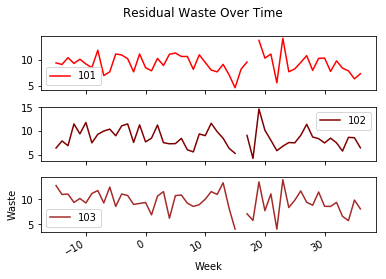

In [34]:
COLORS = ['red', 'maroon', 'brown']

GData1.plot.line(title = 'Residual Waste Over Time', subplots = True, color = COLORS)
plt.xlabel('Week')
plt.ylabel('Waste')
plt.subplots_adjust(hspace = 0.3)
plt.show()

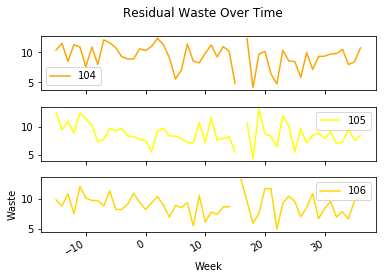

In [35]:
COLORS = ['orange', 'yellow', 'gold']

GData2.plot.line(title = 'Residual Waste Over Time', subplots = True, color = COLORS)
plt.xlabel('Week')
plt.ylabel('Waste')
plt.subplots_adjust(hspace = 0.3)
plt.show()

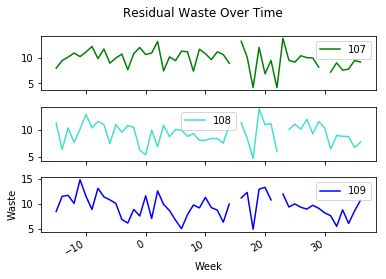

In [36]:
COLORS = ['green', 'turquoise', 'blue']

GData3.plot.line(title = 'Residual Waste Over Time', subplots = True, color = COLORS)
plt.xlabel('Week')
plt.ylabel('Waste')
plt.subplots_adjust(hspace = 0.3)
plt.show()

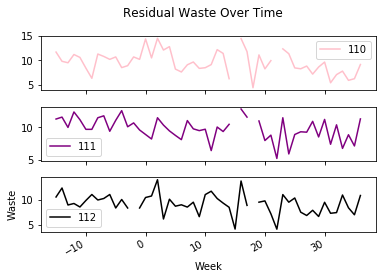

In [37]:
COLORS = ['pink', 'purple', 'black']

GData4.plot.line(title = 'Residual Waste Over Time', subplots = True, color = COLORS)
plt.xlabel('Week')
plt.ylabel('Waste')
plt.subplots_adjust(hspace = 0.3)
plt.show()

The graphs above do not give a clear indication of whether the effects of the intervention were significant and persistent over time. The graphs generally appear to have a gap in the data between week 10 and 20, indiciating that a regression discontinuity approach may have to be used. However, as the cutoff point is not consistent across all routes, this approach is not feasible. Instead, a difference-in-differences approach that recognisises time-varying treatment effects will be used.

### Regression Analysis

#### A Difference-in-Differences Approach to Estimating the Persistence of Behavioural Interventions

This difference-in-differences approach requires 'multiple-treatment-control comparisons'. As the control group in the data is stable. For this approach, I will need to estimate the difference between the treatment and control group at every time interval, with dummies for every period. 

In [38]:
#Creating the time dummies
week_dummies = pd.get_dummies(GDataReg.calendar_week, prefix = 'W').iloc[:,1:]

#Creating a new dataframe
GDataReg = pd.concat([GDataReg, week_dummies], axis=1)

#Viewing the new dataframe
GDataReg.head()

,route,calendar_week,residual_weight,treatment,W_-14,W_-13,W_-12,W_-11,W_-10,W_-9,...,W_27,W_28,W_29,W_30,W_31,W_32,W_33,W_34,W_35,W_36
0,101,-15,9.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,101,-14,9.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,101,-13,9.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,101,-12,9.3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101,-11,9.4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that I have the time dummies for the regression, it is time to perform the regression analysis itself. Something to note is that I will need to used fixed effects in the diff-in-diff regression to ensure that I correctly isolate the treatment effect. The equation for the difference-in-differences estimation can be seen below.

<h3 align="center">$Y_{i,t} = \beta_{0} + W_{-14}\alpha_{-14} + W_{-13}\alpha_{-13} + ... + W_{35}\alpha_{35} + W_{36}\alpha_{36} + \lambda_{i} + \mu_{t} + \epsilon_{i,t}$</h3>

In the above equation, the subscript i denotes the route and t the time period. Y denotes the level of residual waste, and $W_{x}$ is a time dummy relative to the start of the treatment where x denotes the period relative to the treatment. The coefficients of $W_{x}$ are denote by $\alpha_{x}$ and are relative to the period before the treatment i.e. -1. $\lambda_{i}$ controls for time (week) fixed effects i.e. all factors that are constant related to residual weight and the time of the treatment but are constant over time. $\mu_{t}$ control for route fixed effects i.e. all factors that are common among routes.

Now for the regression.

In [39]:
#An OLS fixed effects (route and time) regression, where residual_weight is the dependent variable, and treatment is the treatment variable
FE_olsGarbage = sm.ols(formula = 'residual_weight ~ C(route) + week_dummies + treatment', data = GDataReg).fit()

print(FE_olsGarbage.summary())
            

                            OLS Regression Results                            
Dep. Variable:        residual_weight   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     63.64
Date:                Wed, 30 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:21:05   Log-Likelihood:                -4470.9
No. Observations:                3340   AIC:                             9176.
Df Residuals:                    3223   BIC:                             9891.
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.9983      0.179  

The above output indicates that the treatment effect, i.e. the behavioural intervention introduced by Dur & Vollaard, was successful in reducing the level of residual waste. Indeed, it can be seen that the treatment resulted in a 1.0373 unit decrease in residual waste. This result is of course reliant on the following assumptions holding, in order to make the difference-in-differences appproach valid:

 - The timing of the policy is exogenous
 - There were common trends before the treatment
 - There were not other policies that could bias the relationship
 
 The most important assumption is that the timing of the policy is exogenous, which can be assumed to hold, as demonstrated in the [Visual Analysis](#Visual-Analysis) section.

### Conclusion and Implications

With regards to whether behavioural interventions can have persisent effects, the [Visual Analysis](#Visual-Analysis section was unable to provide a clear answer. However, as was explained above, there does appear to a persistent and significant effect in the [Regression-Analysis](#Regression Analysis) that was performed. This is evident from the coefficient of -1.0373 on the treatment variable, as well as the persistent negative coefficients on the time indicator variables (week_dummies). Thus, I can conclude - from the analysis performed in this assignment - that behavioural interventions were successful in reducing the level of residual waste in Rotterdam over the specified period, and that these interventions were specific.

This conclusion implies that there is scope for behavioural interventions into energy conservation, similar to that done by Hunt Allcott in [2011](https://www.sciencedirect.com/science/article/abs/pii/S0047272711000478) and Allcott and Rogers in [2014](https://www.sciencedirect.com/science/article/abs/pii/S0047272711000478). While this project may not be able to conclusively prove whether behavioural interventions would be successful in energy conservation, they certainly indicate that there is a strong possibility of success, due to the related natures of this project and that of energy conservation. However, this link could of course be made concrete by performing similar analysis with the dataset used by Allcott and Rogers.

Ultimately, to answer the [Research Question](#Research-Question) in a sentence: Yes, behavioural interventions are effective in creating long-term persistent effects, and could be used in energy conservation, although I cannot guarantee success.